[[ 1.          0.9508233   0.84298336  0.89752734 -0.50468338 -0.34564744]
 [ 0.9508233   1.          0.897257    0.9329944  -0.5438005  -0.36985521]
 [ 0.84298336  0.897257    1.          0.86453774 -0.68919551 -0.41636148]
 [ 0.89752734  0.9329944   0.86453774  1.         -0.4168392  -0.30911988]
 [-0.50468338 -0.5438005  -0.68919551 -0.4168392   1.          0.29031611]
 [-0.34564744 -0.36985521 -0.41636148 -0.30911988  0.29031611  1.        ]]


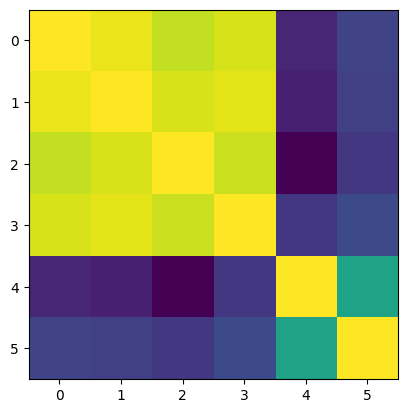

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('/Users/esten/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(int)

predictors = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

correlations = np.corrcoef(df[predictors].values.T)
print(correlations)

plt.imshow(correlations)
plt.show()

[[ 6.64132733e-01  6.20540339e-01]
 [ 1.57459447e+00  8.43334032e-01]
 [ 1.18439658e+00  5.40381761e-01]
 [ 1.18439658e+00  5.36845353e-01]
 [ 9.24264659e-01  5.55706195e-01]
 [ 2.43302983e+00  1.60719812e+00]
 [ 3.00532006e+00  1.62252256e+00]
 [ 2.87525410e+00  1.57301285e+00]
 [ 3.13538603e+00  1.70621754e+00]
 [ 2.22492429e+00  1.02840604e+00]
 [ 1.70466044e+00  6.90089693e-01]
 [ 1.44452851e+00  7.44314613e-01]
 [ 1.18439658e+00  9.23492610e-01]
 [ 3.13538603e+00  1.27800847e-01]
 [-2.46329007e-01 -7.13864217e-01]
 [-2.46329007e-01 -1.70436213e-01]
 [-1.94302622e-01 -2.39985567e-01]
 [-5.06460933e-01 -4.60421656e-01]
 [-4.28421355e-01 -9.99134449e-01]
 [-1.52097544e+00 -1.34688122e+00]
 [-4.54434548e-01 -3.60223434e-01]
 [-3.76394970e-01 -6.45493666e-01]
 [-2.46329007e-01 -7.10327809e-01]
 [ 2.21908459e-01 -8.76538977e-01]
 [-3.76394970e-01 -3.88514696e-01]
 [ 2.87525410e+00  1.93019004e+00]
 [ 2.48505621e+00  1.64845622e+00]
 [ 2.74518814e+00  1.65552903e+00]
 [ 2.30296387e+00  2

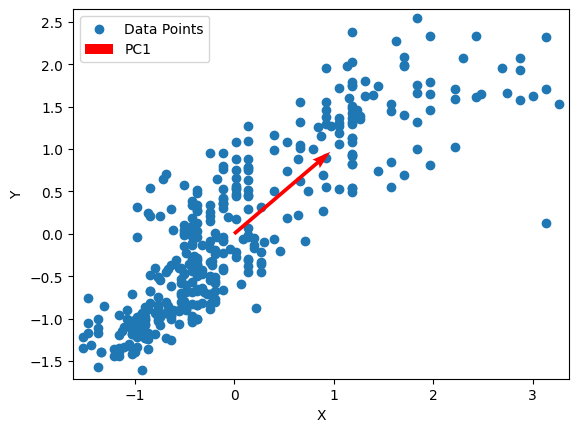

In [88]:
from sklearn.decomposition import PCA

points = df[['horsepower', 'weight']].values
print(points)
points = points.astype(float)
print(points)
points[:,0] = (points[:,0] - np.mean(points[:,0])) / np.std(points[:,0])
points[:,1] = (points[:,1] - np.mean(points[:,1])) / np.std(points[:,1])

pca = PCA(n_components=2)
pca.fit(points)

# Extract PC1
pc1 = pca.components_[0]

# Create a scatter plot of the points
plt.scatter(points[:, 0], points[:, 1], label='Data Points')

# Plot PC1 as a line passing through the mean of the data
mean_point = np.mean(points, axis=0)
scaled_pc1 = pc1 * np.sqrt(pca.explained_variance_[0])  # Scale PC1 by its eigenvalue
plt.quiver(
    mean_point[0], mean_point[1], scaled_pc1[0], scaled_pc1[1],
    angles='xy', scale_units='xy', scale=1, color='red', label='PC1'
)

# Set axis limits
plt.xlim(points[:, 0].min() - 0.1, points[:, 0].max() + 0.1)
plt.ylim(points[:, 1].min() - 0.1, points[:, 1].max() + 0.1)

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

In [44]:
pd.DataFrame(points, columns=['x', 'y']).to_csv('components.csv')

In [91]:
pca.components_[0]
0.707**2 + 0.707**2

0.9996979999999999

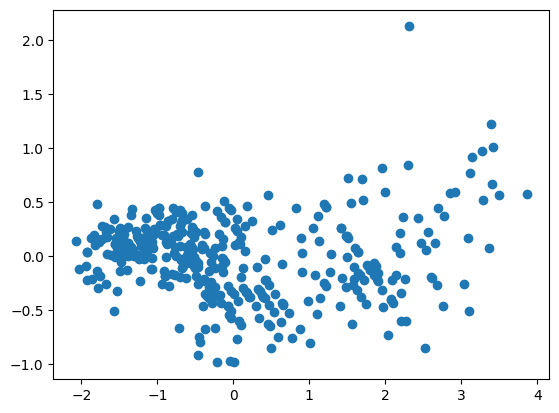

In [50]:
transformed = pca.fit_transform(points)

plt.scatter(transformed[:,0], transformed[:,1])

pd.DataFrame(transformed, columns=['x', 'y']).to_csv('pcs.csv')

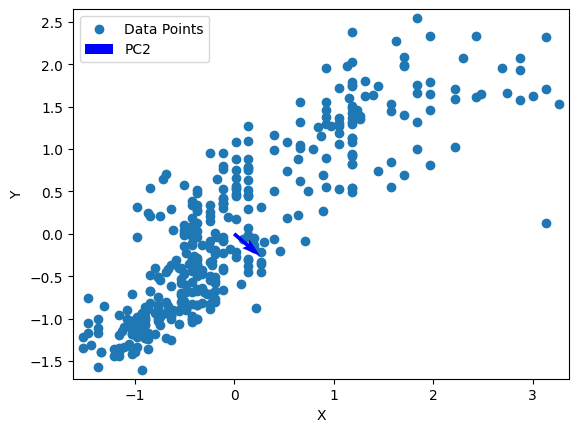

In [47]:

pc2 = pca.components_[1]

# Create a scatter plot of the points
plt.scatter(points[:, 0], points[:, 1], label='Data Points')

# Plot PC2 as a line passing through the mean of the data
mean_point = np.mean(points, axis=0)
scaled_pc2 = pc2 * np.sqrt(pca.explained_variance_[1])  # Scale PC2 by its eigenvalue
plt.quiver(
    mean_point[0], mean_point[1], scaled_pc2[0], scaled_pc2[1],
    angles='xy', scale_units='xy', scale=1, color='blue', label='PC2'
)

# Set axis limits
plt.xlim(points[:, 0].min() - 0.1, points[:, 0].max() + 0.1)
plt.ylim(points[:, 1].min() - 0.1, points[:, 1].max() + 0.1)

# Add labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Show the plot
plt.show()

In [55]:
pca.transform(points)[:10]

array([[0.90840104, 0.03082448],
       [1.70973364, 0.51707922],
       [1.21960246, 0.45538725],
       [1.21710185, 0.45788787],
       [1.04649743, 0.26061019],
       [2.85687258, 0.5839512 ],
       [3.2723789 , 0.97778549],
       [3.14539973, 0.92082362],
       [3.42353072, 1.01057473],
       [2.30045194, 0.84606616]])

In [52]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [75]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/Users/esten/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(int)

predictors = ['weight', 'year', 'horsepower', 'cylinders', 'acceleration', 'displacement']

for predictor in predictors:
    df[predictor] = StandardScaler().fit_transform(np.reshape(df[predictor].values, (-1, 1)))
    
pca = PCA(n_components=6)
values = pca.fit_transform(df[predictors].values)

from sklearn.linear_model import LinearRegression

for i in range(1, 6):
    pca_model = LinearRegression()
    pca_model.fit(values[:,:i], df['mpg'])
    pca_predictions = pca_model.predict(values[:,:i])
    print(f'PCA: {np.mean((df["mpg"] - pca_predictions) ** 2)}')

    model = LinearRegression()
    model.fit(df[predictors[:i]].values, df['mpg'])
    predictions = model.predict(df[predictors[:i]].values)
    print(f'OLS: {np.mean((df["mpg"] - predictions) ** 2)}')

PCA: 17.768526095595018
OLS: 18.6766165974193
PCA: 16.73918103844477
OLS: 11.65548990193504
PCA: 13.191692860127416
OLS: 11.647067660145629
PCA: 12.808296945066726
OLS: 11.638756220219163
PCA: 11.816767551227143
OLS: 11.622956766000994


In [61]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [77]:
import pandas as pd


df = pd.read_csv('/Users/esten/Downloads/Auto.csv')
train = df.iloc[:int(len(df) * 0.8)]
validation = df.iloc[int(len(df) * 0.8):]

print(f'Using {len(train)} samples for training')
print(f'Using {len(validation)} samples for validation')

Using 317 samples for training
Using 80 samples for validation


In [84]:
from sklearn.linear_model import Ridge, Lasso

df = pd.read_csv('/Users/esten/Downloads/Auto.csv')
df = df[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(int)

predictors = ['weight', 'year', 'horsepower', 'cylinders', 'acceleration', 'displacement']

for predictor in predictors:
    df[predictor] = StandardScaler().fit_transform(np.reshape(df[predictor].values, (-1, 1)))
    
ridge = Ridge(alpha=1.)
ridge.fit(df[predictors].values, df['mpg'])
print(ridge.intercept_)
print(ridge.coef_)

lasso = Lasso(alpha=1.)
lasso.fit(df[predictors].values, df['mpg'])
print(lasso.intercept_)
print(lasso.coef_)

23.44591836734694
[-5.59706504  2.75371452 -0.07735632 -0.54916733  0.19573101  0.66082705]
23.44591836734694
[-4.78413333  2.0065162  -0.09637255 -0.          0.         -0.        ]


In [87]:
np.corrcoef(df[predictors].T)

array([[ 1.        , -0.30911988,  0.86453774,  0.89752734, -0.4168392 ,
         0.9329944 ],
       [-0.30911988,  1.        , -0.41636148, -0.34564744,  0.29031611,
        -0.36985521],
       [ 0.86453774, -0.41636148,  1.        ,  0.84298336, -0.68919551,
         0.897257  ],
       [ 0.89752734, -0.34564744,  0.84298336,  1.        , -0.50468338,
         0.9508233 ],
       [-0.4168392 ,  0.29031611, -0.68919551, -0.50468338,  1.        ,
        -0.5438005 ],
       [ 0.9329944 , -0.36985521,  0.897257  ,  0.9508233 , -0.5438005 ,
         1.        ]])